OCR FOR HAND-WRITTEN DIGITS
By - Aiswarya Garlapati 14CO213

The ANN created to emulate an OCR for hand-written digits consists of:
1. An Input layer that has 784 inputs (Each image is flattened to 28 * 28 to input it)
2. Two hidden layers with 512 and 256 neurons respectively which use the "Relu" activation function.
3. The output layer has 10 neurons and uses "Softmax" Activation function

The best performance is obtained for optimizer "Adam" with batch size 128, and number of epochs = 20, which gives an accuracy of 98.31%. The results for other optimizers can be seen below. A detailed account is attached in the read me file.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

In [12]:
np.random.seed(9)
# user inputs
nb_epoch = 20
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

# spliting the MNIST data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

In [13]:
# reshaping the MNIST dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

In [14]:
#convert class vector to binary class matrix
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

#create model summary
model_summary = model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
# compile the model with SGD Optimizer
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.1423 - acc: 0.9601 - val_loss: 0.1463 - val_acc: 0.9581
Epoch 2/20
 - 8s - loss: 0.1377 - acc: 0.9611 - val_loss: 0.1419 - val_acc: 0.9591
Epoch 3/20
 - 10s - loss: 0.1335 - acc: 0.9628 - val_loss: 0.1392 - val_acc: 0.9599
Epoch 4/20
 - 9s - loss: 0.1295 - acc: 0.9638 - val_loss: 0.1355 - val_acc: 0.9611
Epoch 5/20
 - 12s - loss: 0.1256 - acc: 0.9647 - val_loss: 0.1318 - val_acc: 0.9620
Epoch 6/20
 - 9s - loss: 0.1220 - acc: 0.9660 - val_loss: 0.1287 - val_acc: 0.9639
Epoch 7/20
 - 12s - loss: 0.1185 - acc: 0.9671 - val_loss: 0.1255 - val_acc: 0.9632
Epoch 8/20
 - 10s - loss: 0.1153 - acc: 0.9681 - val_loss: 0.1246 - val_acc: 0.9646
Epoch 9/20
 - 10s - loss: 0.1122 - acc: 0.9689 - val_loss: 0.1209 - val_acc: 0.9648
Epoch 10/20
 - 10s - loss: 0.1091 - acc: 0.9701 - val_loss: 0.1187 - val_acc: 0.9649
Epoch 11/20
 - 10s - loss: 0.1063 - acc: 0.9706 - val_loss: 0.1162 - val_acc: 0.9660
Epoch 12/20
 - 10s - loss: 0

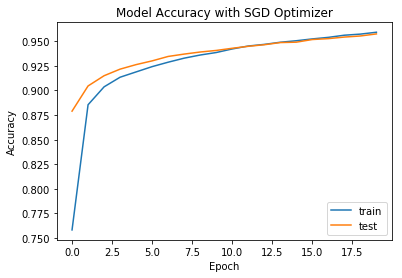

Test Accuracy - 0.9575


In [17]:
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy with SGD Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")
plt.show()

print "Test Accuracy - {}".format(scores[1])

In [19]:
# compile the model with Adagrad Optimizer
model.compile(loss="categorical_crossentropy", optimizer="adagrad", metrics=["accuracy"])

#fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 13s - loss: 0.2998 - acc: 0.9504 - val_loss: 0.0814 - val_acc: 0.9747
Epoch 2/20
 - 13s - loss: 0.0593 - acc: 0.9822 - val_loss: 0.0715 - val_acc: 0.9774
Epoch 3/20
 - 11s - loss: 0.0392 - acc: 0.9887 - val_loss: 0.0654 - val_acc: 0.9786
Epoch 4/20
 - 11s - loss: 0.0281 - acc: 0.9925 - val_loss: 0.0585 - val_acc: 0.9819
Epoch 5/20
 - 13s - loss: 0.0207 - acc: 0.9951 - val_loss: 0.0583 - val_acc: 0.9814
Epoch 6/20
 - 12s - loss: 0.0156 - acc: 0.9969 - val_loss: 0.0570 - val_acc: 0.9816
Epoch 7/20
 - 12s - loss: 0.0120 - acc: 0.9981 - val_loss: 0.0601 - val_acc: 0.9821
Epoch 8/20
 - 14s - loss: 0.0095 - acc: 0.9987 - val_loss: 0.0570 - val_acc: 0.9833
Epoch 9/20
 - 12s - loss: 0.0076 - acc: 0.9990 - val_loss: 0.0570 - val_acc: 0.9832
Epoch 10/20
 - 12s - loss: 0.0062 - acc: 0.9995 - val_loss: 0.0573 - val_acc: 0.9836
Epoch 11/20
 - 14s - loss: 0.0052 - acc: 0.9996 - val_loss: 0.0572 - val_acc: 0.9840
Epoch 12/20
 - 11s - los

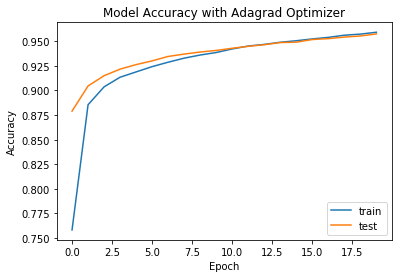

Test Accuracy - 0.9838


In [21]:
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy with Adagrad Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")
plt.show()

print "Test Accuracy - {}".format(scores[1])

In [22]:
# compile the model with Adagrad Optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 11s - loss: 0.0387 - acc: 0.9866 - val_loss: 0.0930 - val_acc: 0.9744
Epoch 2/20
 - 12s - loss: 0.0287 - acc: 0.9903 - val_loss: 0.0889 - val_acc: 0.9756
Epoch 3/20
 - 12s - loss: 0.0242 - acc: 0.9920 - val_loss: 0.0783 - val_acc: 0.9790
Epoch 4/20
 - 13s - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0792 - val_acc: 0.9793
Epoch 5/20
 - 12s - loss: 0.0161 - acc: 0.9945 - val_loss: 0.0774 - val_acc: 0.9811
Epoch 6/20
 - 13s - loss: 0.0166 - acc: 0.9943 - val_loss: 0.0771 - val_acc: 0.9804
Epoch 7/20
 - 12s - loss: 0.0127 - acc: 0.9958 - val_loss: 0.0898 - val_acc: 0.9787
Epoch 8/20
 - 13s - loss: 0.0134 - acc: 0.9955 - val_loss: 0.0998 - val_acc: 0.9771
Epoch 9/20
 - 13s - loss: 0.0115 - acc: 0.9962 - val_loss: 0.0902 - val_acc: 0.9803
Epoch 10/20
 - 15s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0902 - val_acc: 0.9798
Epoch 11/20
 - 14s - loss: 0.0117 - acc: 0.9962 - val_loss: 0.1068 - val_acc: 0.9786
Epoch 12/20
 - 13s - los

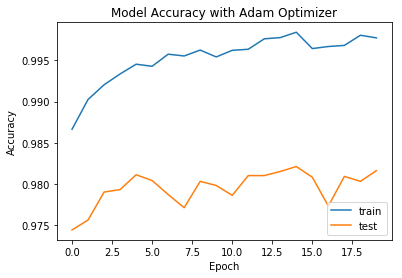

Test Accuracy - 0.9816


In [23]:
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy with Adam Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")
plt.show()

print "Test Accuracy - {}".format(scores[1])

Results with different Optimizers:

SGD - 95.75%
Adagrad - 98.38%
Adam - 98.16%